In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
# read the data
df=pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Lets find out if there is any missing data in the dataframe
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    percent_missing=round(percent_missing,2)
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.28%
gross - 0.02%
company - 0.0%
runtime - 0.0%


In [5]:
#We make a subset for those films that do not have rating,budget and gross info filled in
rating_null= df.loc[:,['name','rating']][df['rating'].isna()]
print(rating_null)

                     name rating
78                Babylon    NaN
91    Mantis Fist Fighter    NaN
102              Das Boot    NaN
298   The State of Things    NaN
464            White Star    NaN
...                   ...    ...
7663         More to Life    NaN
7664          Dream Round    NaN
7665        Saving Mbango    NaN
7666         It's Just Us    NaN
7667            Tee em el    NaN

[77 rows x 2 columns]


In [6]:
budget_null= df.loc[:,['name','budget']][df['budget'].isna()]
print(budget_null)

                  name  budget
16                Fame     NaN
19          Stir Crazy     NaN
24        Urban Cowboy     NaN
25      Altered States     NaN
26     Little Darlings     NaN
...                ...     ...
7657              Leap     NaN
7659         I Am Fear     NaN
7660  Aloha Surf Hotel     NaN
7664       Dream Round     NaN
7667         Tee em el     NaN

[2171 rows x 2 columns]


In [7]:
gross_null= df.loc[:,['name','gross']][df['gross'].isna()]
print(gross_null)

                      name  gross
27       Raise the Titanic    NaN
41          Breaker Morant    NaN
47          The Boogey Man    NaN
49      Lion of the Desert    NaN
52    Can't Stop the Music    NaN
...                    ...    ...
7663          More to Life    NaN
7664           Dream Round    NaN
7665         Saving Mbango    NaN
7666          It's Just Us    NaN
7667             Tee em el    NaN

[189 rows x 2 columns]


In [8]:
#data types for the columns in our dataframe
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

We can see that there's a lot of missing data in three columns. This might have an impact on our analysis in the future. Therefore, I might exclude those films from my calculations.

In [9]:
# Let's fill with 0 all the missing data in order to proceed with our analysis 
df.fillna(0,inplace=True)

In [10]:
# just checking again for missing values
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    #percent_missing=round(percent_missing,2)
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [11]:
# I don't like that the columns 'budget' and 'gross' have nulls after commas. Let's convert these columns to int64 instead.
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [13]:
# While scrolling through the file, I've noticed that there are some discrepancies in the year values of the columns 'released'
# and 'year'. Before proceeding with this issue, we need to remove any extra symbols from the 'released' column, 
# such as '(United States)', etc. I used regex expressions.
df['released']= df['released'].str.replace(r'\(.*\)', '', regex=True)
df['released']

0          June 13, 1980 
1           July 2, 1980 
2          June 20, 1980 
3           July 2, 1980 
4          July 25, 1980 
              ...        
7663    October 23, 2020 
7664    February 7, 2020 
7665      April 27, 2020 
7666     October 1, 2020 
7667     August 19, 2020 
Name: released, Length: 7668, dtype: object

In [14]:
# Now we need to trim out unnecessary spaces in the string.
df['released']=df['released'].str.strip()

In [15]:
# And extract the year numbers in a new column.
df['year_released']=df['released'].str[-4:]
df['year_released']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: year_released, Length: 7668, dtype: object

In [16]:
# Don't know why but still there were 2 empty cells in the 'released' column. So I had to fill them with nulls
df.fillna(0,inplace=True)

In [17]:
# As data type of column 'year' is int64, we can not compare it to the column 'year_released' with date type object. 
# So I cast it to the type of int64.
df['year_released']=df['year_released'].astype('int64')

In [18]:
# Ghecking if the column are equal
df['year_check']=df['year_released']==df['year']

In [19]:
# Selecting films only with mismatched years
# As we can see there 1326 rows of incorrect data. So for further manipulations I'm going to use new column 'year_released'
df.loc[:,['name','year','year_released']][df['year_check']==False]

,name,year,year_released
8,Superman II,1980,1981
11,The Gods Must Be Crazy,1980,1984
21,Heaven's Gate,1980,1981
33,Cattle Annie and Little Britches,1980,1981
40,The Watcher in the Woods,1980,1981
...,...,...,...
7525,Weathering with You,2019,2020
7580,Run with the Hunted,2019,2020
7584,"Faith, Hope & Love",2019,2020
7604,Mine 9,2019,2020


In [20]:
# Let's have a look at the most profitable films sorting the data by 'gross' column
df=df.sort_values(by='gross',inplace = False, ascending=False)

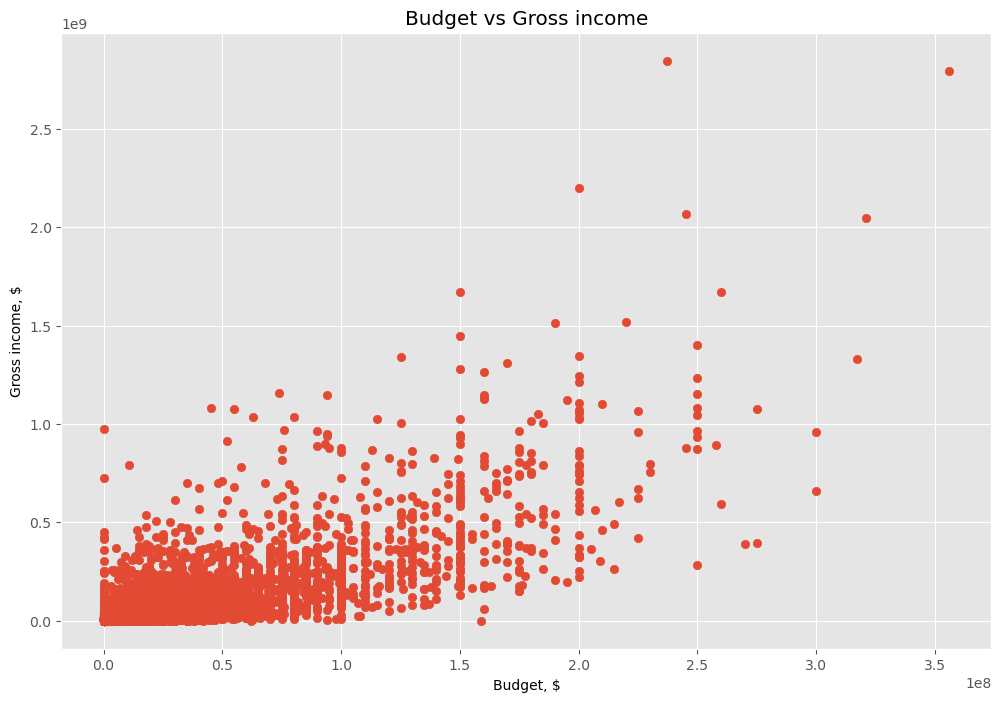

In [22]:
# Let's make a scatter plot for columns 'budget' and 'gross' to visualize the possible correlation between them 
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross income')
plt.xlabel('Budget, $')
plt.ylabel('Gross income, $')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

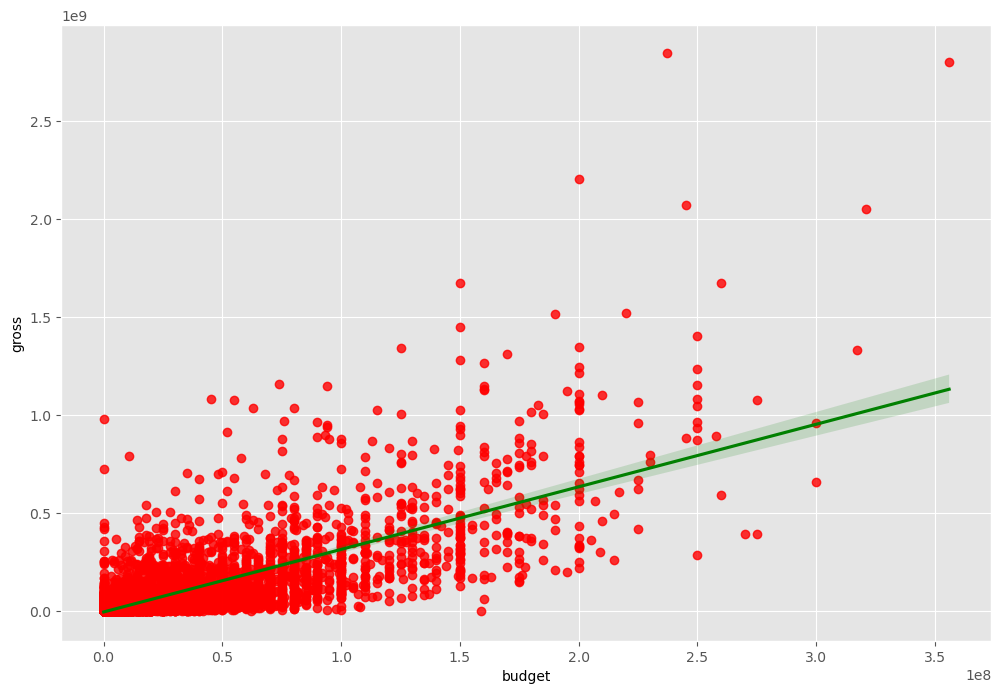

In [23]:
# The same with seaborn and trend line. And we can see that the trend line is going up showing us that there can 
# be significant dependency between these two indicators
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws= {'color':'green'})

In [24]:
df=df.drop(columns='year_check')

In [25]:
# Start looking at the correlation 
cor_subset=df.corr()
cor_subset

C:\Users\admin\AppData\Local\Temp\ipykernel_16856\2946596053.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_subset=df.corr()


,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.312521
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.043598
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.070183
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.108069
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.090394
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.125727
year_released,0.312521,0.043598,0.070183,0.108069,0.090394,0.125727,1.000000


In [26]:
# Just having a glance into the table we can assume that the most correlated data are budget and gross (0.75).
# Also I can point out the votes and gross correlation (0.63)

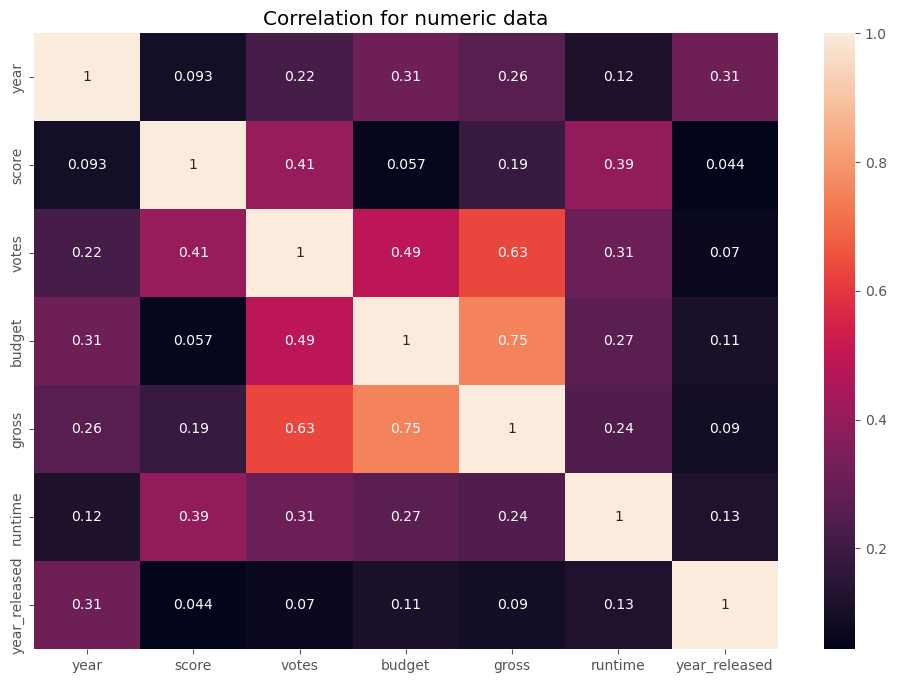

In [27]:
# Lets create a heatmap for our new correlation table. 
sns.heatmap(cor_subset,annot= True)
plt.title('Correlation for numeric data')
plt.show()

In [28]:
# But I would like to know if there is any correlation between non numeric qualities as company, author, etc.  
# The company is a string data type so we need to assign some kind of numerical categories to all the objects.
df_category=df

In [29]:
for col_name in df_category.columns:
    if (df_category[col_name].dtype=='object'):
        df_category[col_name]=df_category[col_name].astype('category')
        df_category[col_name]=df_category[col_name].cat.codes
        
df_category.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,533,6,0,2009,611,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,2009
7445,535,6,0,2019,154,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,2019
3045,6896,6,6,1997,617,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,1997
6663,5144,6,0,2015,613,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,2015
7244,536,6,0,2018,162,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,2018


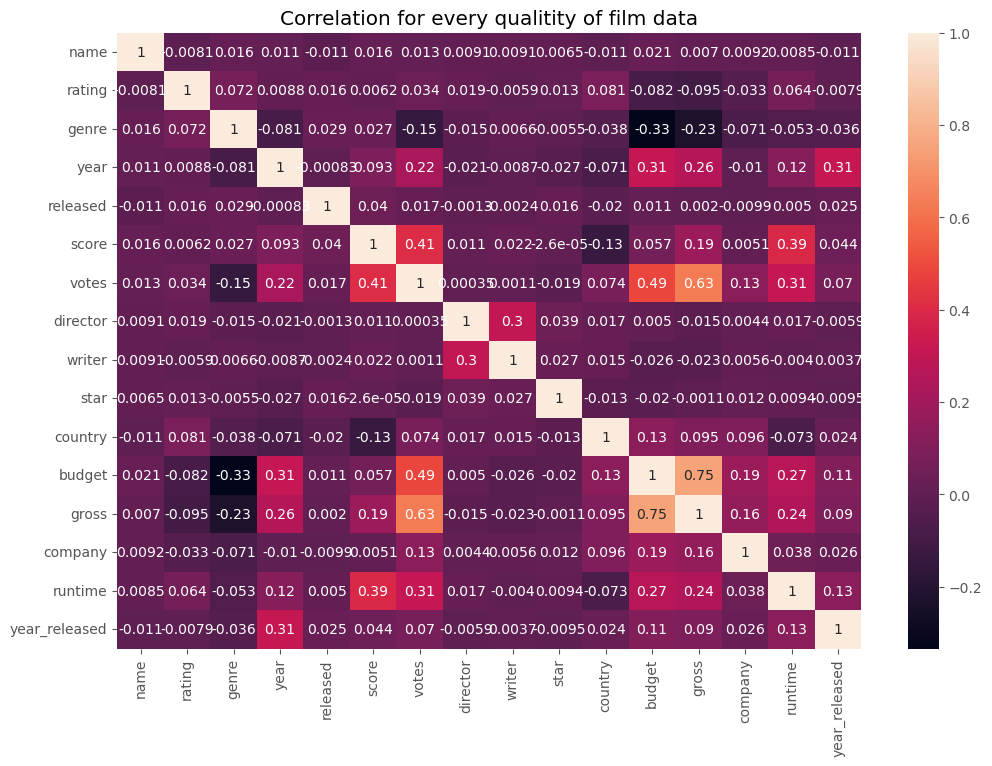

In [30]:
cor_subset_cat= df_category.corr()
sns.heatmap(cor_subset_cat,annot= True)
plt.title('Correlation for every qualitity of film data')
plt.show()

So from our new heatmap is obvious that the features with most significant correlations to gross income are 
budget (0.75),
votes (0.63),
and we can add runtime and year into consideration

In [ ]:
#df.to_excel('output.xlsx', index=False)